In [23]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error , r2_score

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns


In [44]:
# Load data from data
df = pd.read_csv("../data/Scholarship_Probability.csv")
# Check the data 
df.head()
print(df.shape)
df.info()
df.describe()

(500, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Serial No.               500 non-null    int64  
 1   GRE Score                500 non-null    int64  
 2   TOEFL Score              500 non-null    int64  
 3   University Rating        500 non-null    int64  
 4   SOP                      500 non-null    float64
 5   LOR                      500 non-null    float64
 6   CGPA                     500 non-null    float64
 7   Research                 500 non-null    int64  
 8   Scholarship Probability  500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Scholarship Probability
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


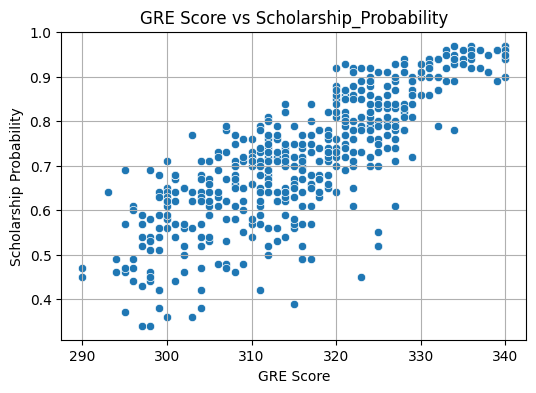

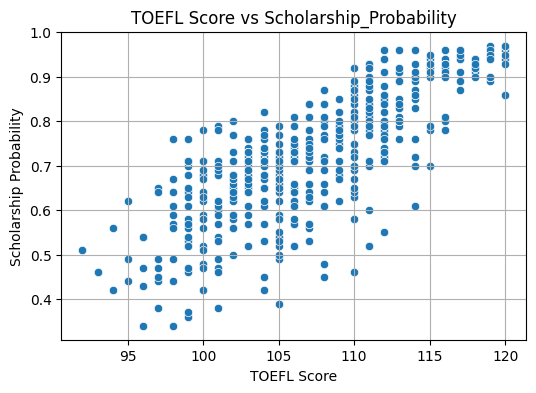

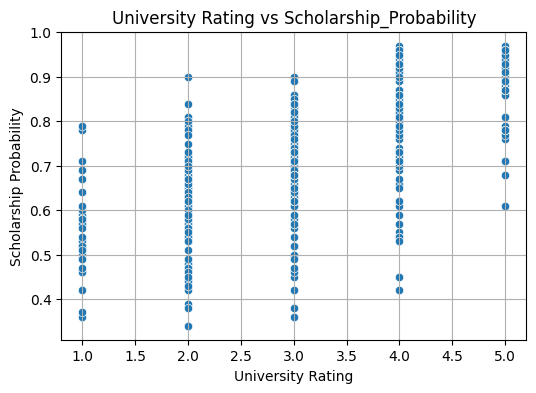

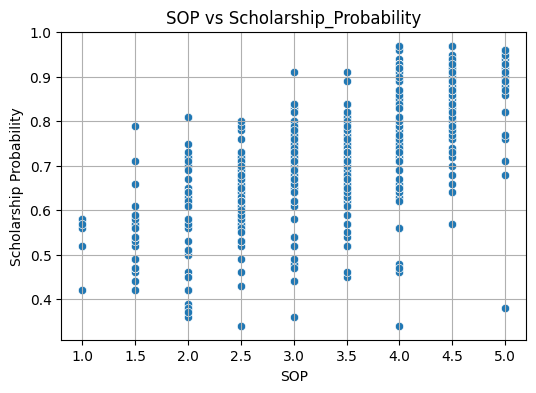

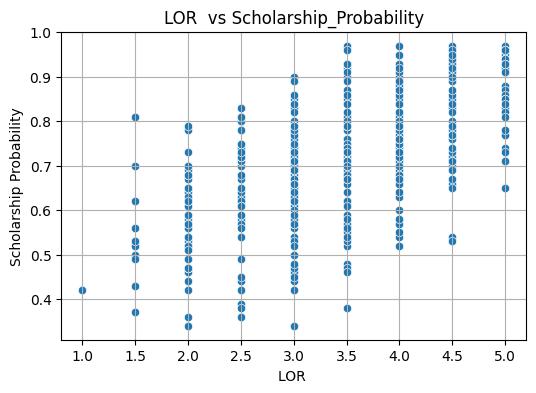

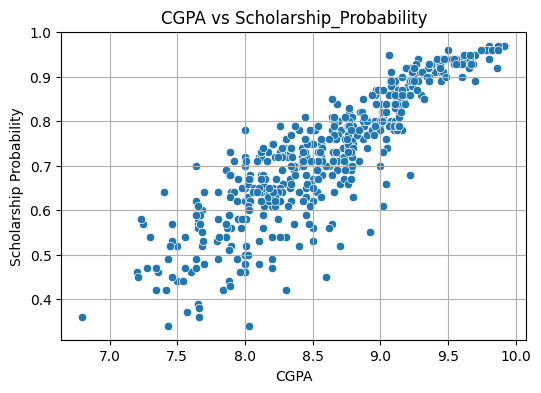

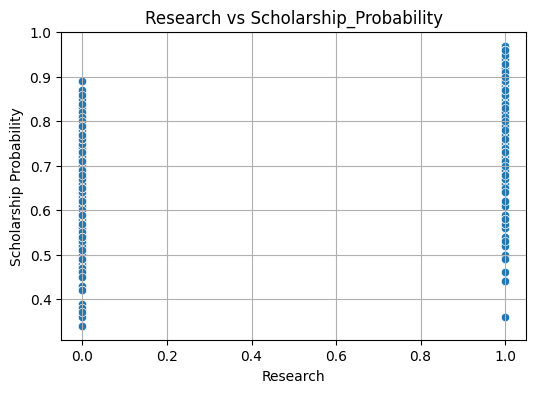

In [ ]:
# Draw some column to detect the relationship between 'Scholarship_Probability'
#Scatter plot
column = df.columns[1:-1]
for i in column :
    plt.figure(figsize=(6, 4))
    sns.scatterplot(data=df, x=i, y='Scholarship Probability')
    plt.title(f'{i} vs Scholarship_Probability')
    plt.grid(True)
    plt.show()
    

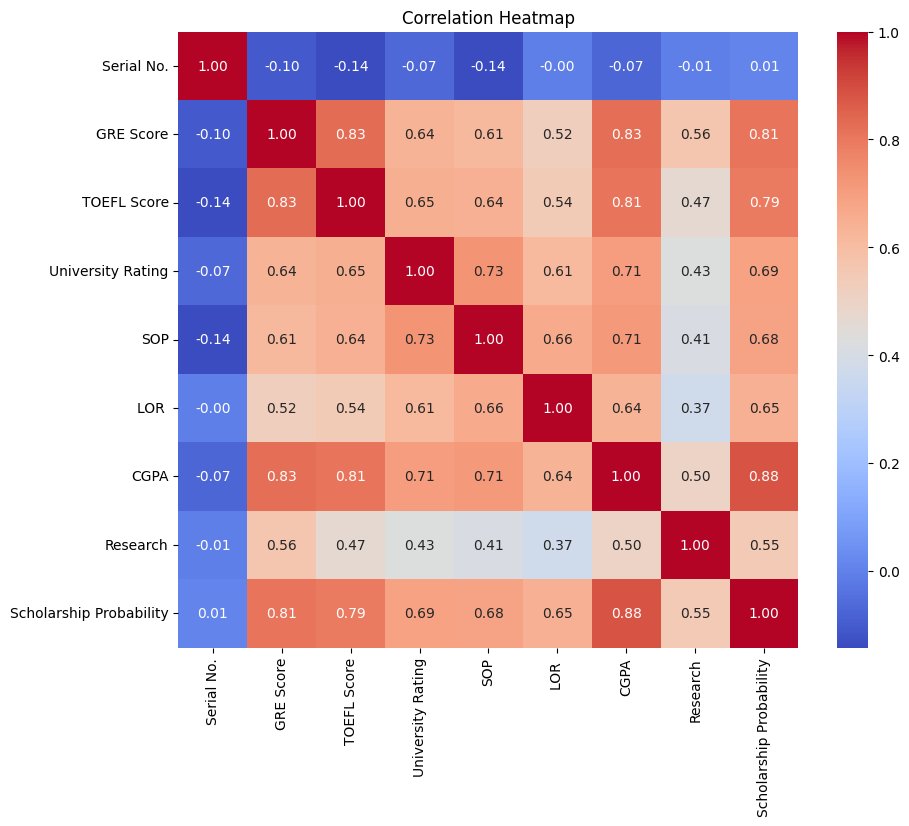

In [26]:
# Heat Map
plt.figure(figsize=(10, 8))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
# After research the best model is Linear_Regresstion

#Data cleaning
df.drop(columns=['Serial No.'],inplace= True)
X = df.drop(columns=['Scholarship Probability'])
Y = df['Scholarship Probability']


In [46]:
#Split data into train_data and test_data
X_train , X_test , Y_train , Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)


In [48]:
#Data Processing
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)


array([[ 1.48887961e+00,  1.56082934e+00,  7.76121546e-01,
         6.25913605e-01,  0.00000000e+00,  1.58648736e+00,
         8.50962943e-01],
       [-1.16381425e-01,  2.29631609e-01,  7.76121546e-01,
         1.12267043e+00,  5.31494003e-01,  7.77715255e-01,
         8.50962943e-01],
       [-3.61183733e-02, -2.69567541e-01, -9.87791059e-01,
        -1.36111371e+00, -1.06298801e+00, -1.47067119e+00,
        -1.17513930e+00],
       [-2.76907529e-01,  3.96031326e-01, -1.05834756e-01,
        -3.67600054e-01, -5.31494003e-01,  2.11574782e-01,
        -1.17513930e+00],
       [ 8.46775196e-01,  8.95230476e-01, -1.05834756e-01,
         1.29156776e-01, -5.31494003e-01,  7.93890697e-01,
         8.50962943e-01],
       [ 1.08756435e+00,  7.28830760e-01,  7.76121546e-01,
         1.12267043e+00,  5.31494003e-01,  1.08504865e+00,
         8.50962943e-01],
       [-2.04269467e+00, -1.10156613e+00, -1.86974736e+00,
        -1.85787054e+00, -1.59448201e+00, -1.61625017e+00,
        -1.1751393

In [49]:
#Modeling
#LinearRegression
model  = LinearRegression()
model.fit(X_train,Y_train)
y_pred = model.predict(X_test)
y_pred


array([0.91311069, 0.80069764, 0.58267465, 0.7148738 , 0.81837596,
       0.86267598, 0.49224203, 0.65988333, 0.82760058, 0.81176406,
       0.72643799, 0.73197671, 0.66319509, 0.93342934, 0.82661254,
       0.52481599, 0.83963607, 0.60989533, 0.54778766, 0.58628052,
       0.67573814, 0.56726319, 0.72975948, 0.79767458, 0.78355435,
       0.6153196 , 0.94764416, 0.84855229, 0.63695152, 0.75075048,
       0.56883341, 0.73539037, 0.55756274, 0.86344197, 0.66546963,
       0.74305332, 0.56718857, 0.95549319, 0.65579824, 0.7178363 ,
       0.96579279, 0.58798661, 0.67935389, 0.85977496, 0.93747316,
       0.59016205, 0.9553761 , 0.84079635, 0.79830323, 0.9255607 ,
       0.88994605, 0.57704363, 0.71313972, 0.54005212, 0.95114293,
       0.60557972, 0.95223596, 0.74455169, 0.67412891, 0.51718556,
       0.64120194, 0.68961635, 0.61010665, 0.60411721, 0.4577116 ,
       0.60053138, 0.86865714, 0.89799617, 0.6671033 , 0.71247015,
       0.62947568, 0.78904121, 0.69660302, 0.57487002, 0.56735

In [50]:
#Evalute
mse = mean_squared_error(y_pred=y_pred,y_true=Y_test)
r2 = r2_score(y_pred= y_pred , y_true = Y_test )
print(mse , r2)

0.003761745104884725 0.8160515841132164


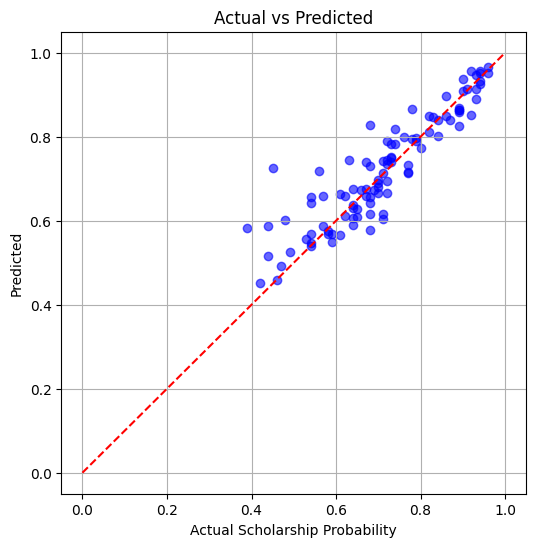

In [53]:
# Compare y_pred vs y_test
plt.figure(figsize=(6, 6))
plt.scatter(Y_test, y_pred, alpha=0.6, color='blue')
plt.plot([0, 1], [0, 1], 'r--')  #  y = x
plt.xlabel('Actual Scholarship Probability')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.grid(True)
plt.show()